O objetivo deste notebook é fazer uma análise perfil dos estudantes, que fizeram o Enem 2023, com base na escolha da língua estrangeira para a prova.

Os dados analisados podem ser encontrados em

https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

# 0. Células-Chave

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('MICRODADOS_ENEM_2023.csv', sep=';',encoding='latin-1')
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,F,E,D,5.0,F,C,C,D,C,D,C,B,B,D,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,E,E,B,3.0,H,A,B,C,C,A,B,B,B,A,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4305108,Caxias do Sul,43,RS,1,1,1,1,1221.0,1193.0,1204.0,1211.0,502.0,498.9,475.6,363.2,DBEBDCECCBCEBBBBDBABDDBBAABCBACDBACECCBAADEBB,ABDEADAADCDABDCADAEABCDDCBAADCCBEBCEBEBDBEAED,ACEBDCABAACAEBAECEBBBAAECBBDEADCAECCCEDDABEED,CEAEACCCDABCDAACEDDBAAEBABDDEEBDAECABDBCBCADE,1.0,DBEABDABDCACDBECDDDBCAAABBACCCADEBECCCEDAEEED,ACEEABAADCDAADEABCDABCDCABCBDADEBAECABADBCDAE,DBABBAEBAAAACDACDEDAACADBADBCCEACCCEAAECBBEBCA...,BCCDEEABCBEDCEABBEBDABDDADDADECAADDCCBEBEABCC,1.0,140.0,200.0,100.0,120.0,140.0,700.0,H,E,C,F,5.0,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,1.0,0,2304400.0,Fortaleza,23.0,CE,2.0,1.0,1.0,2304400,Fortaleza,23,CE,1,1,1,1,1224.0,1192.0,1202.0,1214.0,459.0,508.5,507.2,466.7,DEEBEACCCEBDDBDCCCAEEDCBAAADBCBEEEDCDAAECBEEC,DDAAEEBCCDEADBCDDCBAECABEBDEBDABECECEDCDDAEED,ADBDADAEEEACAABBACADCAEBBAAEBBCDEBBDDADDCADAA,EECBAEDEEDDDBBAADEECDBBBECEAACEAEECDBEDDBCDCB,0.0,CDDDABBABDBEABDECCEEEDCEDAEBABDCCAACCCADACDBE,DBAADEADCDCABABCDDEBAEABAECABAACECDAECBDAABCD,BBBDAABAEACCEEEDEACBCACAACAACAAAECBBEDBCCADBDE...,EBDADDAEBEACBEDCECCBEABCADEBCCBCCDEBDDAABBADD,1.0,140.0,200.0,160.0,180.0,200.0,880.0,D,D,B,B,5.0,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,1.0,0,2311306.0,Quixadá,23.0,CE,2.0,1.0,1.0,2311306,Quixadá,23,CE,1,1,1,1,1222.0,1191.0,1201.0,1212.0,402.5,379.2,446.9,338.3,AECCEAACDEABEEECDBAEEAAADDEABCBCEBACEEDCBEABD,CADEBCEDDEBCBAEBADDCECACADBDEBABDBDBEEDBBEADC,AABBACBCAEDABDADEDAACCAEEEECAACDCADBAEACDEAAE,CDBABEDCEEBBBDECDEBACCAABDEDCBECDECABBDBDEECC,0.0,CAAADCCCCDDDABDCACDBEEEDCEDAEECCDBEABDBABBAEB,CDAEECABAACEAADECBDAABCDCABADCDEABAABCDDEBADB,BBDABAAEBADACEEDCCDBADBDEDCCEBCACEACAACAACACBB...,DCECACCBDECBEEABEABDDAADDABBBCCBCCDDAEBDADEEB,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,A,A,4.0,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A


In [ ]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

# 1. Organizando os Dados

## Vizualizando a proporção de alunos que optou por cada língua

In [ ]:
df.loc[:, 'TP_LINGUA'].value_counts()

,count
TP_LINGUA,
0.0,451117
1.0,406863


([<matplotlib.patches.Wedge at 0x7a987344d7d0>,
 [Text(-0.02350472508447732, 1.0997488476459991, ''),
  Text(0.02350472508447719, -1.0997488476459991, '')],
 [Text(-0.012820759136987629, 0.5998630078069086, '50.7%'),
  Text(0.012820759136987556, -0.5998630078069086, '49.3%')])

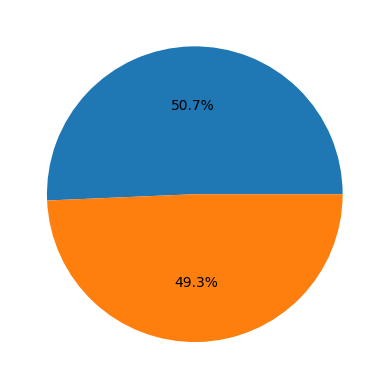

In [ ]:
plt.pie(df.loc[:, 'TP_LINGUA'].value_counts(), autopct='%1.1f%%')

## Criando um df com as colunas desejadas

In [ ]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [ ]:
dfp = df.loc[:, ['TP_LINGUA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TP_FAIXA_ETARIA', 'TP_SEXO','TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ESCOLA',]].copy()
dfp.head()

,TP_LINGUA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA
0,0.0,NaN,NaN,NaN,NaN,NaN,14,M,2,1,1,1
1,0.0,NaN,NaN,NaN,NaN,NaN,12,M,2,1,0,1
2,1.0,502.0,498.9,475.6,363.2,700.0,6,F,1,1,1,1
3,0.0,459.0,508.5,507.2,466.7,880.0,2,F,1,3,1,2
4,0.0,402.5,379.2,446.9,338.3,560.0,3,F,1,3,1,2


In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35137 entries, 0 to 35136
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TP_LINGUA         35136 non-null  float64
 1   NU_NOTA_CN        26376 non-null  float64
 2   NU_NOTA_CH        27356 non-null  float64
 3   NU_NOTA_LC        27356 non-null  float64
 4   NU_NOTA_MT        26376 non-null  float64
 5   NU_NOTA_REDACAO   27355 non-null  float64
 6   TP_FAIXA_ETARIA   35137 non-null  int64  
 7   TP_SEXO           35137 non-null  object 
 8   TP_ESTADO_CIVIL   35137 non-null  int64  
 9   TP_COR_RACA       35137 non-null  int64  
 10  TP_NACIONALIDADE  35137 non-null  int64  
 11  TP_ESCOLA         35137 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 3.2+ MB


### Renomeando as respostas de certas colunas para facilitar o entendimento

In [ ]:
dicionario = {'TP_LINGUA': {0: 'INGLES', 1: 'ESPANHOL'},
             'TP_ESTADO_CIVIL': {0: 'Não informado', 1: 'Solteiro(a)', 2: 'Casado(a)', 3: 'Divorciado(a)', 4:'Viúvo(a)'},
             'TP_COR_RACA': {0: 'N/I', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena'},
             'TP_NACIONALIDADE' : {0: 'N/I', 1: 'Brasileira', 2: 'Brasileira naturalizada', 3: 'Estrangeira', 4: 'Brasileira nata, nascida ext'},
             'TP_ESCOLA': {1: 'Não respondeu', 2: 'Pública', 3: 'Privada'}
             }

dfp.replace(dicionario, inplace=True)
dfp.head()

,TP_LINGUA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA
0,INGLES,NaN,NaN,NaN,NaN,NaN,14,M,Casado(a),Branca,Brasileira,Não respondeu
1,INGLES,NaN,NaN,NaN,NaN,NaN,12,M,Casado(a),Branca,N/I,Não respondeu
2,ESPANHOL,502.0,498.9,475.6,363.2,700.0,6,F,Solteiro(a),Branca,Brasileira,Não respondeu
3,INGLES,459.0,508.5,507.2,466.7,880.0,2,F,Solteiro(a),Parda,Brasileira,Pública
4,INGLES,402.5,379.2,446.9,338.3,560.0,3,F,Solteiro(a),Parda,Brasileira,Pública


# 2. Análise de Dados

## Obtendo uma descrição estatistica geral do df

In [ ]:
notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'] # colunas que serão analisadas
operacoes = ['describe'] # operações realizadas
aggregation_dict = {col: operacoes for col in notas} # aplicando as operações em cada coluna
dfp.groupby('TP_LINGUA').agg(aggregation_dict) #realizando a analise

NU_NOTA_CN                                                          \
            describe                                                           
               count        mean        std  min    25%    50%    75%    max   
TP_LINGUA                                                                      
ESPANHOL    285898.0  470.985867  77.546697  0.0  424.0  467.7  517.9  856.7   
INGLES      352984.0  509.497922  87.939806  0.0  452.5  508.1  564.0  868.4   

          NU_NOTA_CH                                                          \
            describe                                                           
               count        mean        std  min    25%    50%    75%    max   
TP_LINGUA                                                                      
ESPANHOL    299505.0  500.621837  81.339262  0.0  448.7  505.7  555.8  823.0   
INGLES      365509.0  543.137412  85.286987  0.0  492.4  550.6  601.7  823.0   

          NU_NOTA_LC                                                          \
            describe                                                           
               count        mean        std  min    25%    50%    75%    max   
TP_LINGUA                                                                      
ESPANHOL    299505.0  497.842090  69.360135  0.0  455.3  501.5  544.8  773.5   
INGLES      365509.0  534.814698  73.089702  0.0  490.6  540.2  585.2  820.8   

          NU_NOTA_MT                                                           \
            describe                                                            
               count        mean         std  min    25%    50%    75%    max   
TP_LINGUA                                                                       
ESPANHOL    285898.0  489.493561  112.559236  0.0  405.7  473.6  561.7  958.6   
INGLES      352984.0  557.253994  132.445220  0.0  454.6  553.3  655.2  958.6   

          NU_NOTA_REDACAO                                                    \
                 describe                                                     
                    count        mean         std  min    25%    50%    75%   
TP_LINGUA                                                                     
ESPANHOL         299505.0  598.756281  213.224411  0.0  480.0  600.0  760.0   
INGLES           365509.0  670.843344  203.575655  0.0  560.0  680.0  840.0   

                   
                   
              max  
TP_LINGUA          
ESPANHOL   1000.0  
INGLES     1000.0

## Obtendo a nota máxima de cada grupo de nacionalidade de cada lingua

In [ ]:
operacoes = ['max']
aggregation_dict = {col: operacoes for col in ['NU_NOTA_LC']}
dfp.groupby(['TP_LINGUA', 'TP_NACIONALIDADE']).agg(aggregation_dict)



NU_NOTA_LC
                                              max
TP_LINGUA TP_NACIONALIDADE                       
ESPANHOL  Brasileira                        773.5
          Brasileira nata, nascida ext      704.0
          Brasileira naturalizada           668.6
          Estrangeira                       700.9
          N/I                               618.0
INGLES    Brasileira                        820.8
          Brasileira nata, nascida ext      748.4
          Brasileira naturalizada           745.7
          Estrangeira                       668.5
          N/I                               706.0

## Obtendo as informações gerais dos estudantes com a maior nota na área de linguagens de cada lingua

In [ ]:
#max esp = 751.8          max ing = 768.9

dfp.loc[(dfp['NU_NOTA_LC'] == 751.8) | (dfp['NU_NOTA_LC'] == 768.9)].drop(columns=notas)

,TP_LINGUA,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA
30803,ESPANHOL,3,M,Solteiro(a),Branca,Brasileira,Não respondeu
142949,INGLES,2,M,Solteiro(a),Parda,Brasileira,Privada
631389,INGLES,4,F,Solteiro(a),Branca,Brasileira,Não respondeu


## Obtendo a média das notas na área de linguagens, por tipo de língua e nacionalidade

In [ ]:
operacoes = ['mean']
aggregation_dict = {col: operacoes for col in ['NU_NOTA_LC']}
dfp.groupby(['TP_LINGUA', 'TP_NACIONALIDADE']).agg(aggregation_dict).sort_values(by=('NU_NOTA_LC', 'mean'), ascending=False)

NU_NOTA_LC
                                              mean
TP_LINGUA TP_NACIONALIDADE                        
INGLES    Brasileira nata, nascida ext  549.107198
          Brasileira                    535.467441
          Estrangeira                   513.398718
ESPANHOL  Estrangeira                   499.209469
          Brasileira                    498.336400
INGLES    Brasileira naturalizada       497.519507
ESPANHOL  Brasileira nata, nascida ext  492.979699
          Brasileira naturalizada       479.554547
INGLES    N/I                           475.581944
ESPANHOL  N/I                           447.730636

## Obtendo a proporção de cada sexo por língua

In [ ]:
dfp.groupby('TP_SEXO')['TP_LINGUA'].value_counts(normalize=True)

TP_SEXO  TP_LINGUA
F        INGLES       0.500972
         ESPANHOL     0.499028
M        INGLES       0.579735
         ESPANHOL     0.420265
Name: proportion, dtype: float64

In [ ]:
dfp.groupby('TP_LINGUA')['TP_SEXO'].value_counts(normalize=True)

TP_LINGUA  TP_SEXO
ESPANHOL   F          0.720749
           M          0.279251
INGLES     F          0.652576
           M          0.347424
Name: proportion, dtype: float64

**CONCLUSÕES**

* MAIS MULHERES FAZEM A PROVA
* HOMENS TENDEM A OPTAR MAIS POR INGLÊS

## Obtendo a proporção de cada tipo de escola por língua

In [ ]:
dfp.groupby('TP_ESCOLA')['TP_LINGUA'].value_counts(normalize=True)


TP_ESCOLA      TP_LINGUA
Não respondeu  INGLES       0.500956
               ESPANHOL     0.499044
Privada        INGLES       0.804202
               ESPANHOL     0.195798
Pública        INGLES       0.525469
               ESPANHOL     0.474531
Name: proportion, dtype: float64

In [ ]:
dfp.groupby('TP_LINGUA')['TP_ESCOLA'].value_counts(normalize=True)

TP_LINGUA  TP_ESCOLA    
ESPANHOL   Não respondeu    0.622836
           Pública          0.355198
           Privada          0.021966
INGLES     Não respondeu    0.563889
           Pública          0.354742
           Privada          0.081369
Name: proportion, dtype: float64

**CONCLUSÕES:**
*   ESTUDANTES DE ESCOLA PRIVADA PREFEREM MAJORITARIAMENTE FAZER A PROVA EM INGLÊS
*   ESTUDANTES DE ESCOLA PÚBLICA NÃO TEM UMA PREFERENCIA MAJORITÁRIA
*   ESTUDANTES DE ESCOLA PRIVADA SÃO UMA MINORIA DO TODO



## Média das notas de cada língua por sexo

In [ ]:
dfp.groupby(['TP_LINGUA', 'TP_SEXO']).agg(aggregation_dict).sort_values(by=('NU_NOTA_LC', 'mean'), ascending=False)

NU_NOTA_LC
                         mean
TP_LINGUA TP_SEXO            
INGLES    M        536.362254
          F        533.997881
ESPANHOL  F        499.465383
          M        493.586276

In [ ]:
dfp.groupby(['TP_LINGUA']).agg(aggregation_dict).sort_values(by=('NU_NOTA_LC', 'mean'), ascending=False)

,NU_NOTA_LC
,mean
TP_LINGUA,
INGLES,534.814698
ESPANHOL,497.842090


## Teste t

In [ ]:
operacoes = ['var', 'mean']
aggregation_dict = {col: operacoes for col in ['NU_NOTA_LC']}
teste = dfp.groupby(['TP_LINGUA'])['TP_LINGUA'].value_counts().to_list()

teste.append(dfp.groupby(['TP_LINGUA']).agg(aggregation_dict).values)
dfp.groupby(['TP_LINGUA']).agg(aggregation_dict)
#dfp.groupby(['TP_LINGUA',]).agg(aggregation_dict)

NU_NOTA_LC            
                   var        mean
TP_LINGUA                         
ESPANHOL   4810.828346  497.842090
INGLES     5342.104588  534.814698

In [ ]:
teste[2][0][1]

497.84208978147274

In [ ]:
504.31338364 * 504.31338364

254331.9889184258

In [ ]:
teste[0][2]

504.31338364392417

In [ ]:
n1s1 = teste[0] * teste[2][0][0]
n1s2 = teste[1] * teste[2][1][0]
nsnum = n1s1 + n1s2
nsma = teste[0] + teste[1]
nsden =  nsma - 2
nsmu = teste[0] * teste[1]

s2 = (nsnum / nsden) * (nsma/nsmu)

s = np.sqrt(s2)

m1 = teste[2][0][1]
m2 = teste[2][1][1]

t = (m1 - m2) / s
t
#gl = nsden
#gl

-239.686540368459

In [ ]:

n1, s1_2, m1 = teste[0]
n2, s2_2, m2 = teste[1]

# Variância combinada
s2_pooled = ((n1 - 1) * s1_2 + (n2 - 1) * s2_2) / (n1 + n2 - 2)

# Erro padrão
s_error = np.sqrt(s2_pooled * (1/n1 + 1/n2))

# Estatística t
t = (m1 - m2) / s_error

# Graus de liberdade
gl = n1 + n2 - 2

print(f"Estatística t: {t}")
print(f"Graus de liberdade: {gl}")


Estatística t: -38.55445978883353
Graus de liberdade: 27353.0


In [ ]:
dfp.head()

,TP_LINGUA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA
0,INGLES,NaN,NaN,NaN,NaN,NaN,14,M,Casado(a),Branca,Brasileira,Não respondeu
1,INGLES,NaN,NaN,NaN,NaN,NaN,12,M,Casado(a),Branca,N/I,Não respondeu
2,ESPANHOL,502.0,498.9,475.6,363.2,700.0,6,F,Solteiro(a),Branca,Brasileira,Não respondeu
3,INGLES,459.0,508.5,507.2,466.7,880.0,2,F,Solteiro(a),Parda,Brasileira,Pública
4,INGLES,402.5,379.2,446.9,338.3,560.0,3,F,Solteiro(a),Parda,Brasileira,Pública


<Axes: xlabel='NU_NOTA_LC', ylabel='Count'>

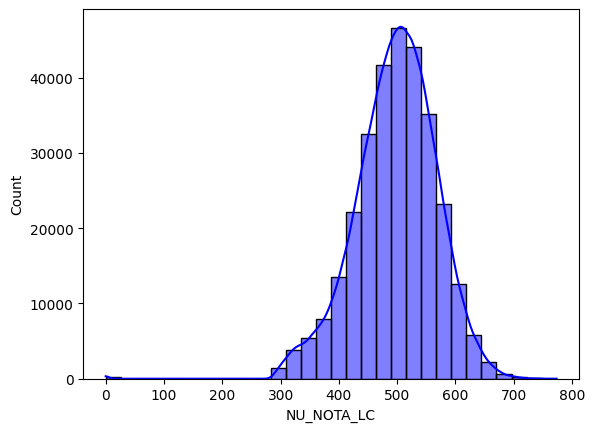

In [ ]:
sns.histplot(dfp.loc[dfp['TP_LINGUA'] == 'ESPANHOL']['NU_NOTA_LC'], kde=True, bins=30, color='blue')

<Axes: xlabel='NU_NOTA_LC', ylabel='Count'>

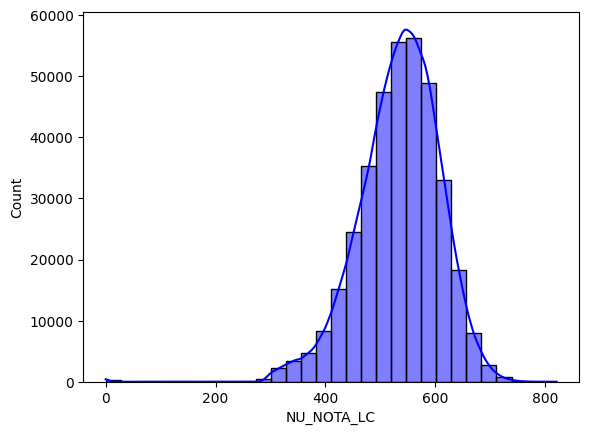

In [ ]:
sns.histplot(dfp.loc[dfp['TP_LINGUA'] == 'INGLES']['NU_NOTA_LC'], kde=True, bins=30, color='blue')

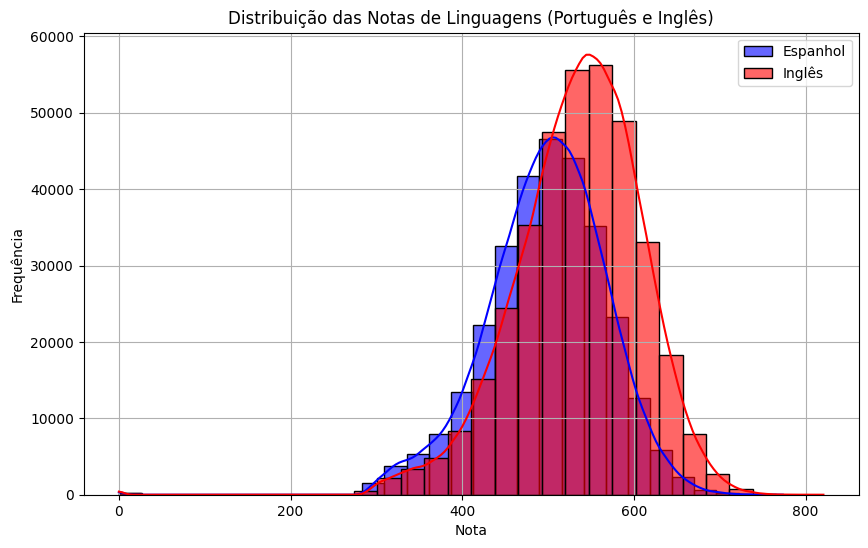

In [ ]:
# Criar o gráfico
plt.figure(figsize=(10, 6))

# Plotar a distribuição das notas para Espanhol e Inglês
sns.histplot(dfp.loc[dfp['TP_LINGUA'] == 'ESPANHOL']['NU_NOTA_LC'], kde=True, bins=30, color='blue', label='Espanhol', alpha=0.6)
sns.histplot(dfp.loc[dfp['TP_LINGUA'] == 'INGLES']['NU_NOTA_LC'], kde=True, bins=30, color='red', label='Inglês', alpha=0.6)

# Adicionar título e legendas
plt.title('Distribuição das Notas de Linguagens (Português e Inglês)')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.legend()  # Exibir legenda
plt.grid(True)

# Mostrar o gráfico
plt.show()